$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [2]:
import numpy as np 

#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[3000,4],[4,2]])

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  K = (np.linalg.eig(A)[0]).max() / (np.linalg.eig(A)[0]).min()
  return K

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

$\textbf{Question:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$

Yes, we can identify matrix $\mathbf{Q}$. 

The condition $\mathbf{Q}$ is : \\
$\mathbf{Q}$  = $((\mathbf{D}^k)^{\frac{1}{2}})^T \mathbf{A}^k (\mathbf{D}^k)^{\frac{1}{2}}$, 

 $\mathbf{A^\it k}$ is the  Hessian matrix.

$\textbf{Question:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$

Yes we can find a suitable choice for  $\mathbf{D}^k$. 

The diagonal matrix $\mathbf{D}^k\$ is: \\

\begin{equation} \\ \mathbf{D}^k =
\begin{bmatrix}
\frac{1}{3000} & 0 \\ 0 & \frac{1}{2}
\end{bmatrix}
\end{equation}

Write code to find the matrix $\mathbf{D}^k$. 

In [3]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  d_k = np.array([[1/evalh(x)[0][0], 0],[0, 1/evalh(x)[1][1]]])
  return d_k
  

In [4]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return 1500*x[0]**2 + 4*x[0]*x[1] + x[1]**2
  


In [5]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([3000*x[0]+4*x[1],4*x[0]+2*x[1]])
  

In [6]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
  
  
  numerator=np.dot(gradf.transpose(),gradf)    
  denominator=2*np.dot(np.dot(gradf.transpose(),A),gradf)
  step_length=numerator/denominator    #add appropriate arguments to the function
  return step_length
  #Complete the code 
  

In [7]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 

  alpha = alpha_start
  #implement the backtracking line search
  p= -gradf
  while(evalf(x+alpha*p) > evalf(x) + gamma*alpha*np.dot(gradf.transpose(),p)):
    alpha = rho*alpha


  #print('final step length:',alpha)
  return alpha
  

In [8]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  while evalf(x + alpha*direction) > ( evalf(x) +  (gamma*alpha*np.dot(gradf,direction)) ):
    alpha = rho*alpha
  return alpha


In [9]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH_SCALING = 4

In [10]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  
  #Complete the code   
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    # print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k

In [11]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)
  d_k = compute_D_k(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SCALING):
    alpha = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    direction = -np.matmul(d_k,g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH_SCALING:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,direction,alpha,rho,gamma)
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.matmul(np.multiply(step_length,g_x),d_k)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x ,k

  #Complete the code

## **Answer 7:**
$f(x) = 1500x_1^2 + 4x_1 x_2 +  x_2^2 \\ \text{Using calculus,} \\ f_{x_1} = 3000x_1 + 4x_2 = 0\\ f_{x_2} = 4x_1 + 2x_2=0 \\ \text{Solving the system of linear equations, we get} \\ x_1 = 0, x_2 = 0 \\ x=(0,0) \text{ is a stationary point of f.}\\ \text{Differentiating again to check for the nature of stationary point,}\\ r= f_{x_1x_1} = 3000 \\ s = f_{x_1x_2}=4 \\ t = f_{x_2x_2}=2 \\ D = rt-s^2 = 3000*2 - 4^2>0 \\ \text{Hence, }x=(0,0) \text{ is a point of minima of f.} \\ \text{Minima = }(0,0) \\ \text{Minimum Functional value }f(x) = 0$

## **Answer 8:**

In [12]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [13]:
#check gradient descent with exact line search 
opt_x , iterations = find_minimizer_gd(my_start_x,my_tol,EXACT_LINE_SEARCH)
print('Minimizer using exact line serach =',opt_x)
print('Function value =',evalf(opt_x))
print('Number of iterations required =',iterations)


Minimizer using exact line serach = [-7.44595231e-16  4.61544291e-13]
Function value = 2.1248011077913554e-25
Number of iterations required = 14075


In [14]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
opt_x , iterations = find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print('Minimizer using exact line serach =',opt_x)
print('Function value =',evalf(opt_x))
print('Number of iterations required =',iterations)

Minimizer using exact line serach = [-4.78532202e-16  4.53575301e-13]
Function value = 2.0520584176089396e-25
Number of iterations required = 21985


In [15]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
opt_x , iterations = find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH_SCALING,alpha_start,rho,gamma)
print('Minimizer using exact line serach =',opt_x)
print('Function value =',evalf(opt_x))
print('Number of iterations required =',iterations)

Minimizer using exact line serach = [-2.31674405e-18  9.60515434e-16]
Function value = 9.217397790469283e-31
Number of iterations required = 16


Here we can observe that the number of iterations required using exact line search is still less than the backtrack line search method without scaling as earlier, but when we use scaling the backtrack line search converges very fast. Also in all the cases the minimizer is converging to (0,0) as found using calculus. The minimum value of the function is also approaching 0. 

The key point in the convergence here is the sign of $x_1,x_2$ values. $x_1$ is negative while $x_2$ is positive so as to alter the effect of the square terms in $f(x)$.

**Using exact line search:** \
Minimizer = [-7.44595231e-16  4.61544291e-13] \
Minimum value f(x) = 2.1248011077913554e-25 \
No of iterations = 14075 \

**Using backtrack line search without scaling:** \
Minimizer = [-4.78532202e-16  4.53575301e-13]\
Minimum value f(x) =2.0520584176089396e-25 \
No of iterations = 21985 \

**Using backtrack line search with scaling:** \
Minimizer = [-2.31674405e-18  9.60515434e-16] \
Minimum value f(x) = 9.217397790469283e-31 \
No of iterations = 16 \

## **Answer 9:**

In [16]:
print('For backtracking line search without scaling:')
alpha_values = [1., 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
no_of_iterations = []
for alpha in alpha_values:
  opt_x,iterations = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  print("\n\nFor alpha :",alpha )
  print('Minimizer value =',opt_x)
  print('Function value =',evalf(opt_x))
  print('Number of iterations required =',iterations)
  no_of_iterations.append(iterations)

For backtracking line search without scaling:


For alpha : 1.0
Minimizer value = [-4.78532202e-16  4.53575301e-13]
Function value = 2.0520584176089396e-25
Number of iterations required = 21985


For alpha : 0.9
Minimizer value = [-5.48799355e-16  4.71515450e-13]
Function value = 2.2174352131747877e-25
Number of iterations required = 15941


For alpha : 0.75
Minimizer value = [-7.18643891e-16  4.89175378e-13]
Function value = 2.386610528547938e-25
Number of iterations required = 6750


For alpha : 0.6
Minimizer value = [-6.07554226e-16  4.94036636e-13]
Function value = 2.43425264283868e-25
Number of iterations required = 6887


For alpha : 0.5
Minimizer value = [-4.78532202e-16  4.53575301e-13]
Function value = 2.0520584176089396e-25
Number of iterations required = 21985


For alpha : 0.4
Minimizer value = [-7.24091328e-16  4.84454819e-13]
Function value = 2.3407977615582728e-25
Number of iterations required = 11362


For alpha : 0.25
Minimizer value = [-4.78532202e-16  4.53575301e-13]

In [17]:
print('For backtracking line search with scaling:')
alpha_values = [1., 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
no_of_iterations_scaled = []
for alpha in alpha_values:
  opt_x,iterations = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING,alpha,rho,gamma)
  print("\n\nFor alpha :",alpha )
  print('Minimizer value =',opt_x)
  print('Function value =',evalf(opt_x))
  print('Number of iterations required =',iterations)
  no_of_iterations_scaled.append(iterations)

For backtracking line search with scaling:


For alpha : 1.0
Minimizer value = [-2.31674405e-18  9.60515434e-16]
Function value = 9.217397790469283e-31
Number of iterations required = 16


For alpha : 0.9
Minimizer value = [-1.54825431e-16  5.99636318e-15]
Function value = 6.819918471923856e-29
Number of iterations required = 21


For alpha : 0.75
Minimizer value = [-2.78273450e-16  1.07784868e-14]
Function value = 2.203324807217389e-28
Number of iterations required = 32


For alpha : 0.6
Minimizer value = [-3.37385169e-16  1.30849588e-14]
Function value = 3.2430059206322086e-28
Number of iterations required = 47


For alpha : 0.5
Minimizer value = [-2.51144512e-16  9.75949896e-15]
Function value = 1.800539902805011e-28
Number of iterations required = 62


For alpha : 0.4
Minimizer value = [-3.26530890e-16  1.27315971e-14]
Function value = 3.0539815808527905e-28
Number of iterations required = 83


For alpha : 0.25
Minimizer value = [-2.68853026e-16  1.05480788e-14]
Function value = 2.

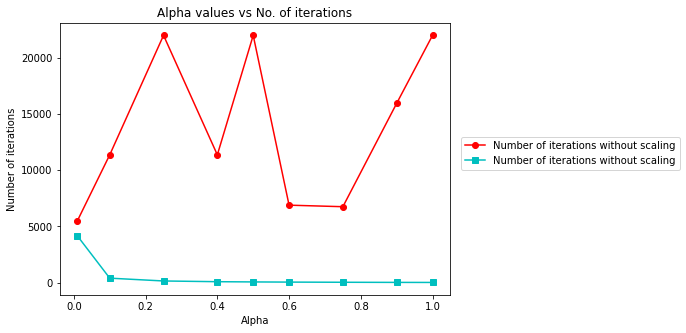

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(alpha_values,no_of_iterations,'r-o',label = 'Number of iterations without scaling' )
plt.plot(alpha_values,no_of_iterations_scaled,'c-s',label = 'Number of iterations without scaling')
plt.xlabel('Alpha')
plt.ylabel('Number of iterations')
plt.title("Alpha values vs No. of iterations")
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 0.6))
plt.show()

From the graph we can observe that the number of iterations required using backtrack line search algorithm with scaling is almost negligible as compared to when no scaling is done. 

When scaling is not done, the graph of number of iterations is showing some unusual behaviour, while in case of scaling the number of iterations decreases as we increase the value of alpha. There is a drastic decrease when the alpha value is increased from 0.01 to 0.1 and after that the slope is very small.

Also in case of line search with scaling and non scaling the optimal function values differ by a factor of $10^3$ i.e. when scaling is done the function values becomes approx. $10^-3$ times of the functional values when scaling is not done.

## **Answer 10:**

In [19]:
print('For backtracking line search without scaling:')
rho_values = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
no_of_iterations = []
alpha=1.0
for rho in rho_values:
  opt_x,iterations = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  print("\n\nFor rho :",rho )
  print('Minimizer value =',opt_x)
  print('Function value =',evalf(opt_x))
  print('Number of iterations required =',iterations)
  no_of_iterations.append(iterations)

For backtracking line search without scaling:


For rho : 0.9
Minimizer value = [-6.44686128e-16  4.90962904e-13]
Function value = 2.404019351870065e-25
Number of iterations required = 127


For rho : 0.75
Minimizer value = [-7.15454842e-16  4.83616543e-13]
Function value = 2.332687511412074e-25
Number of iterations required = 3135


For rho : 0.6
Minimizer value = [-7.07691748e-16  4.70469643e-13]
Function value = 2.2076113616544364e-25
Number of iterations required = 15834


For rho : 0.5
Minimizer value = [-4.78532202e-16  4.53575301e-13]
Function value = 2.0520584176089396e-25
Number of iterations required = 21985


For rho : 0.4
Minimizer value = [-5.16461460e-16  4.67846629e-13]
Function value = 2.1831406770108246e-25
Number of iterations required = 20049


For rho : 0.25
Minimizer value = [-5.67128954e-16  4.70177132e-13]
Function value = 2.204823842206756e-25
Number of iterations required = 24570


For rho : 0.1
Minimizer value = [-4.35224428e-16  4.42644725e-13]
Function value

In [20]:
print('For backtracking line search with scaling:')
rho_values = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
no_of_iterations_scaled = []
alpha = 1.0
for rho in rho_values:
  opt_x,iterations = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING,alpha,rho,gamma)
  print("\n\nFor rho :",rho )
  print('Minimizer value =',opt_x)
  print('Function value =',evalf(opt_x))
  print('Number of iterations required =',iterations)
  no_of_iterations_scaled.append(iterations)

For backtracking line search with scaling:


For rho : 0.9
Minimizer value = [-1.90920422e-16  3.38018326e-15]
Function value = 6.352016622002106e-29
Number of iterations required = 14


For rho : 0.75
Minimizer value = [-3.59593964e-18  9.57478862e-16]
Function value = 9.223897999650174e-31
Number of iterations required = 15


For rho : 0.6
Minimizer value = [-2.68496827e-18  1.53311688e-15]
Function value = 2.3447954703965872e-30
Number of iterations required = 15


For rho : 0.5
Minimizer value = [-2.31674405e-18  9.60515434e-16]
Function value = 9.217397790469283e-31
Number of iterations required = 16


For rho : 0.4
Minimizer value = [-2.10920879e-18  1.38155681e-15]
Function value = 1.903716407388883e-30
Number of iterations required = 16


For rho : 0.25
Minimizer value = [-6.9534609e-16  4.5561674e-13]
Function value = 2.0704462793405916e-25
Number of iterations required = 16


For rho : 0.1
Minimizer value = [-6.22892805e-16  4.51919078e-13]
Function value = 2.0368685744853975

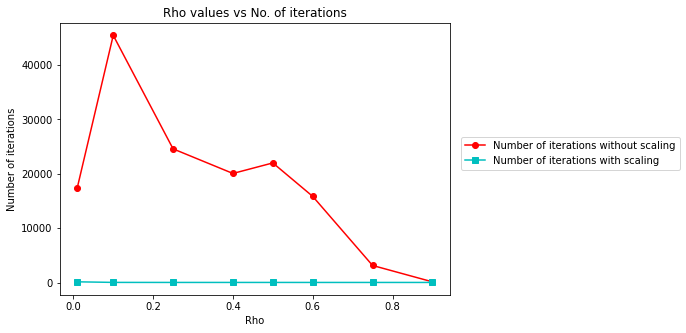

In [22]:
plt.figure(figsize=(7,5))
plt.plot(rho_values,no_of_iterations,'r-o',label = 'Number of iterations without scaling' )
plt.plot(rho_values,no_of_iterations_scaled,'c-s',label = 'Number of iterations with scaling')
plt.xlabel('Rho')
plt.ylabel('Number of iterations')
plt.title("Rho values vs No. of iterations")
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 0.6))
plt.show()

From the graph, we can observe that for backtracking method without scaling, as we increase the value of rho from 0.01 to 0.1, there is a sudden increase in the number of iterations and after that the overall trend is negative i.e. as we increase the value of rho, the number of iterations decrease.

For backtrack method with scaling, as we increase the value of rho, the number of iterations remains somewhat similar.

Also the number of iterations required when scaling is done is very less as compared to that in case of no scaling.

Unlike alpha values, there is no particular trend observed in functional values of the function. For smaller values of rho, the function value attained in both the cases are kind of similar.